 # How is the development of the programming language Python in Germany? 

The data analysis uses the data from Stackoverflow Annual Developer Survey of the years 2020, 2021 and 2022.

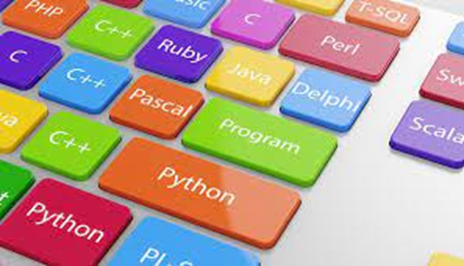

### Introduction

With the progressive digitization of society and the increasing use of artificial intelligence and data science in more and more areas of life, the Python programming language is becoming increasingly important. So also in Germany.  

Has Python already become a standard for these applications? Or at least a quasi-standard?

Real data is analyzed for this report. It is checked whether the programming language Python is actually gaining in importance in Germany or whether the assumptions about "Python becoming the standard" are just rumors.

For the research, we take the data from Stackoverflow's annual developer surveys for the years 2020, 2021 and 2022.

The survey asks more than 150 questions, including:

"What are the programming languages you have to work with?"  
"What are the programming languages you want to work with?"  
"What is your education level?"


### Here the code starts

In [14]:
# handle datasets
import numpy as np
import pandas as pd
from collections import Counter

# make plots
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [15]:
# show all columns in the dataframes
pd.pandas.set_option('display.max_columns', None)

In [16]:
# read datasets
df_2020 = pd.read_csv("stack-overflow-developer-survey-2020/survey_results_public.csv", sep = ",")
df_2021 = pd.read_csv("stack-overflow-developer-survey-2021/survey_results_public.csv", sep = ",")
df_2022 = pd.read_csv("stack-overflow-developer-survey-2022/survey_results_public.csv", sep = ",")

In [17]:
# 2020 data
df_2020.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [18]:
# 2021 data
df_2021.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",100 to 499 employees,EUR European Euro,NaN,Monthly,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,NaN,NaN,Angular;jQuery,Angular;jQuery,NaN,NaN,NaN,NaN,NaN,NaN,Windows,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,Neutral,No,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",GBP\tPound sterling,NaN,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassandra;Elasticsearch;PostgreSQL;Redis,Na

In [19]:
# 2020 data
df_2022.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,macOS,Windows Subsystem for Linux (WSL),Git,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very unfavorable,Collectives on Stack Overflow;Stack Overflow f...,Daily or almost daily,Yes,Daily or almost daily,Not sure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,Data scientist or machine learning specialist;...,20 to 99 employees,I have some influence,NaN,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,Collectives on Stack Overflow;Stack Overflow;S...,Multiple times per day,Yes,Multiple times per day,Neutral,25-34 years old,Man,No,Bisexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,"Developer, full-stack",100 to 499 employees,I have some influence,Other (please specify):,Israel,ILS\tIsraeli new shekel,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,ASP.NET;ASP.NET Core,ASP.NET;ASP.NET Core,.NET,.NET,NaN,NaN,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,Windows,Windows,Git,Code editor;Command-line;Version control hosti...,NaN,NaN,Jira Work Management;Trello,Jira Work Management;Trello,Slack;Zoom

### How has the use of the Python programming language developed in Germany in recent years?

In [20]:
# filter dataframes by country
# return filterd dataframes with 'used languages' and 'wanted languages'

def filter_country(df, column_filter, country, columns):
       
    df_country = df
    
    for column in columns: 
        df_country = df_country[df_country[column_filter] == country].dropna(subset=[column])
        
    return df_country

# filter the dataframe by Germany and selecting columns 'used languages' and 'wanted languages'
germany_2020 = filter_country(df_2020, 'Country', 'Germany', ['LanguageWorkedWith', 'LanguageDesireNextYear'])
germany_2021 = filter_country(df_2021, 'Country', 'Germany', ['LanguageHaveWorkedWith', 'LanguageWantToWorkWith'])
germany_2022 = filter_country(df_2022, 'Country', 'Germany', ['LanguageHaveWorkedWith', 'LanguageWantToWorkWith'])

In [23]:
# split columns in series with 'used languages' and 'wanted languages'
# return splitted series

def split_col(df, column):
    
    df_country = df
    split_col_series = df_country[column].apply(lambda x: x.split(';'))
    
    return split_col_series

# split dataframes with 'used languages'
work_lang_2020 = split_col(germany_2020, 'LanguageWorkedWith')
work_lang_2021 = split_col(germany_2021, 'LanguageHaveWorkedWith')
work_lang_2022 = split_col(germany_2022, 'LanguageHaveWorkedWith')

# split dataframes with 'wanted languages'
want_lang_2020 = split_col(germany_2020, 'LanguageDesireNextYear')
want_lang_2021 = split_col(germany_2021, 'LanguageWantToWorkWith')
want_lang_2022 = split_col(germany_2022, 'LanguageWantToWorkWith')



In [24]:
# flatten nested lists
# return flat lists

def flat_list(nest_list):
        
    position = []
    
    for row in nest_list:
        for pos in row:
            position.append(pos.strip())
            
    return position

# nested lists flattened
list_work_lang_2020 = flat_list(work_lang_2020)
list_work_lang_2021 = flat_list(work_lang_2021)
list_work_lang_2022 = flat_list(work_lang_2022)

list_want_lang_2020 = flat_list(want_lang_2020)
list_want_lang_2021 = flat_list(want_lang_2021)
list_want_lang_2022 = flat_list(want_lang_2022)


In [30]:
# group datas by count to list
# return result dictionary

def group_list(data, year):
       
    grouped_list = dict(Counter(data))
    grouped_dict = [{'Programming Language':key, 'Count': value, 'Year': year} for key, value in grouped_list.items()]
    
    return grouped_dict

# group lists and create dictionaries
dict_work_lang_2020 = group_list(list_work_lang_2020, '2020')
dict_work_lang_2021 = group_list(list_work_lang_2021, '2021')
dict_work_lang_2022 = group_list(list_work_lang_2022, '2022')

dict_want_lang_2020 = group_list(list_want_lang_2020, '2020')
dict_want_lang_2021 = group_list(list_want_lang_2021, '2021')
dict_want_lang_2022 = group_list(list_want_lang_2022, '2022')

In [68]:
# create three dataframes, append the dataframes
# return appended dataframe

def create_df(data):
        
    df1 = pd.DataFrame(data[0])
    df2 = pd.DataFrame(data[1])
    df3 = pd.DataFrame(data[2])

    app_df = df1.append(df2)
    app_df = app_df.append(df3)
    
    return app_df

# creating data frame appending the data
work_lang = create_df([dict_work_lang_2020, dict_work_lang_2021, dict_work_lang_2022])
want_lang = create_df([dict_want_lang_2020, dict_want_lang_2021, dict_want_lang_2022])

In [69]:
# scaling data
# return scaling data

def scaling(df, column):
    
    df_new = df
    series = []
    
    for vals in df_new[column].unique():
        series.append(df_new[df_new[column] == vals]['Count'] / 
                      df_new[df_new[column] == vals]['Count'].sum())
    
    joined_series = pd.Series()
    for new_series in series:
        joined_series = joined_series.append(new_series)
   
    return joined_series

# calculate percentage
work_lang['Percentage'] = scaling(work_lang, 'Year')
want_lang['Percentage'] = scaling(want_lang, 'Year')


In [94]:
# get top 10 languages
top10_work_lang = work_lang.sort_values(by=['Percentage'], ascending=False).head(30)['Programming Language'].unique()
top10_want_lang = want_lang.sort_values(by=['Percentage'], ascending=False).head(30)['Programming Language'].unique()

work_lang_chart = work_lang[work_lang['Programming Language'].isin(top10_work_lang)]
want_lang_chart = want_lang[want_lang['Programming Language'].isin(top10_want_lang)]

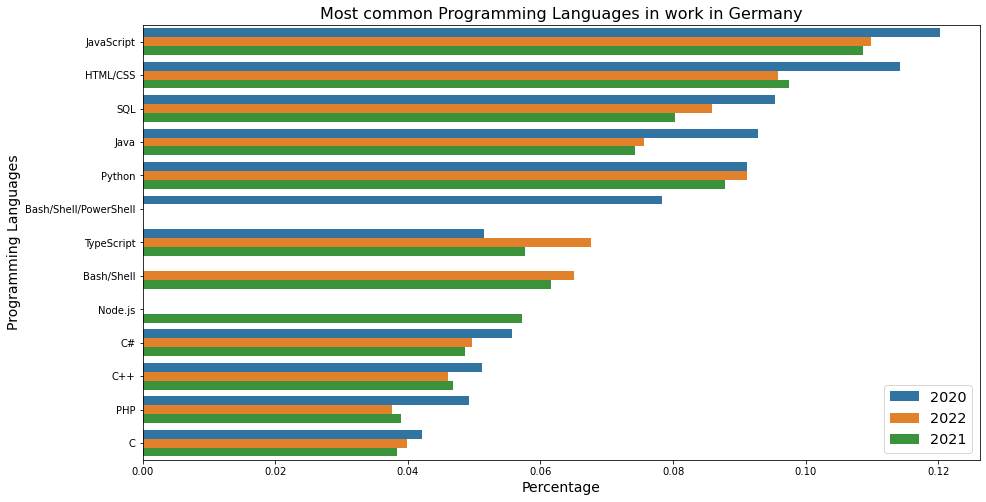

In [95]:
# plot figure 1 — percentage of programming languages in work
# among all the cited programming languages by the respondents

plt.figure(figsize=(15,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            hue = 'Year',
            data = work_lang_chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most common Programming Languages in work in Germany', size = 16)
plt.show()

### 1. What are the programming languages in use in Germany?
This analysis shows that the level of Python usage in Germany has remained about the same in recent years. In contrast, the use of programming languages such as JavaScript, HTML, sql and Java is declining compared to 2020. Overall, this can be interpreted in the way that Python tends to gain importance. 

Overall, the analysis result is somewhat distorted by the fact that the Stack Overflow annual data does not contain corresponding information for all programming languages in the years under review, e.g. for Node.js.

Bash/Shell/PowerShell data is only available for 2020, Bash/Shell data is available for 2021 and 2022. In thought, these two categories can be merged. For a simplified view, it is assumed that Bash/Shell in 2021/2022 is synonymous with Bash/Shell/PowerShell in 2020.

But which programming languages are currently of interest to users so that users want to learn these languages?

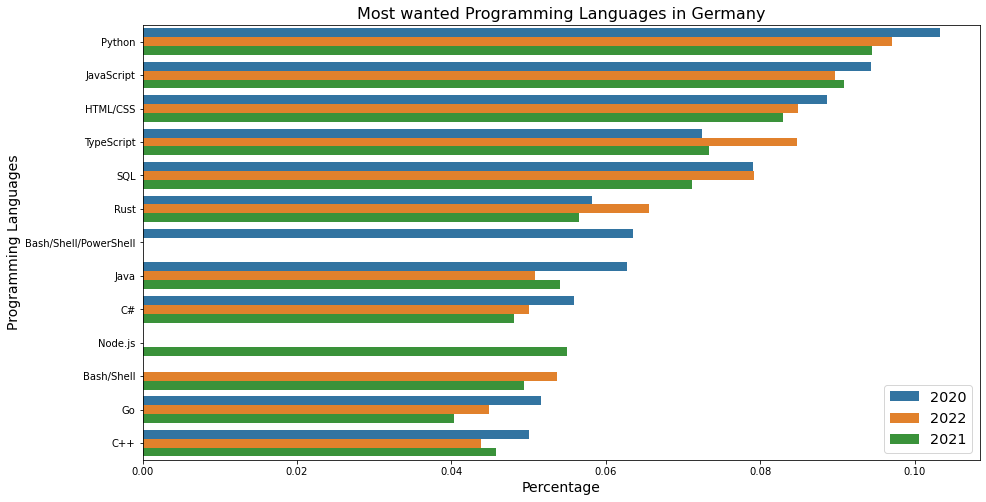

In [97]:
# plot Figure 2 — percentage of wanted programming languages
# among all the cited programming languages by the respondents

plt.figure(figsize=(15,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            hue = 'Year',
            data = want_lang_chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most wanted Programming Languages in Germany', size = 16)
plt.show()

### 2. What are the desired programm languages in Germany?
A clear result can be seen here. Python is currently, as it has been for the past two years, the language most valued by users. Although the relative popularity of Python has declined slightly since 2020, this trend can be observed for most programming languages.

The fact that the programming languages TypeScipt and Rust, in contrast to the other programming languages included in the evaluation, have significantly increased in popularity among users, is remarkable.

But here, too, the analysis result is somewhat distorted by the fact that the Stack Overflow Annual Data does not contain corresponding information for all programming languages in the years under review, e.g. for Node.js.

As with the first analysis, Bash/Shell/PowerShell data is only available for 2020, Bash/Shell data is available for 2021 and 2022. In thought, these two categories can be merged. For simplicity, assume that Bash/Shell in 2021/2022 is synonymous with Bash/Shell/PowerShell in 2020.


In [91]:
# group data to create a new dataframe

row = []
for itens in list(zip(work_lang_2022, want_lang_2022)):
    for i in itens[0]:
        row.append({
            'Work_PL': i, 
            'Want_PL': Counter(itens[0])
        })
        
programm_lang_matrix = pd.DataFrame(row).groupby('Work_PL').agg({'Want_PL': 'sum'}).reset_index()

In [92]:
# creating matrix

for row in programm_lang_matrix['Work_PL']:
    programm_lang_matrix[row] = 0

for index, row in programm_lang_matrix.iterrows():
    total = sum([value for key, value in dict(row['Want_PL']).items()])
    for key, value in dict(row['Want_PL']).items():
         programm_lang_matrix[key].loc[index] = (value / total)

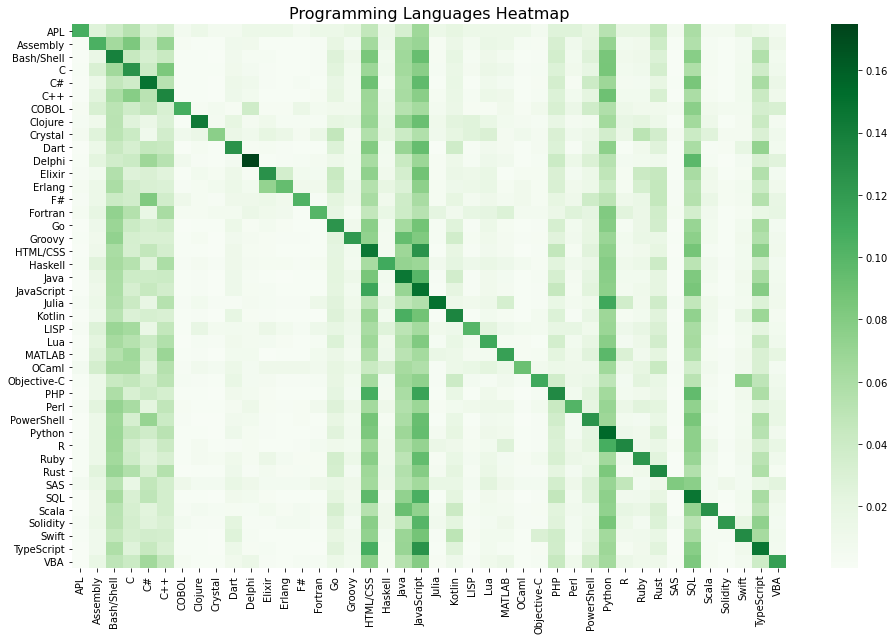

In [93]:
## igure 3 — percentage of relationship of work programming languages and desire programming 
## languages in 2022.

matrix = programm_lang_matrix.drop('Want_PL', axis=1)\
                                        .set_index('Work_PL')

plt.figure(figsize=(16, 10))
sns.heatmap(matrix, cmap="Greens")
plt.title('Programming Languages Heatmap', size = 16)
plt.ylabel('')
plt.show()

### 3. How does the Python programming language used at work currently relate to programming languages that people want to learn?
The previous analyzes have shown that Python is one of the most used programming languages in Germany. Furthermore, Python is the programming language most favored by users. That said, Python is the number 1 programming language that users want to learn.

This leads to the following question:

"What other programming languages are interesting for users who already use Python?"

To answer this question, a heat map was created. It shows how the programming languages used relate to the desired programming languages. The darker the matrix cell, the more related the programming languages are.

Several lessons can be learned from the heat map.
1. The diagonal fields are all dark. This means that the programming languages ​​used are favored by the respective users. This is no surprise!
2. In addition to Python itself, Python users essentially also favor the programming languages ​​HTML/CSS, JavaScript and sql.
3. On the other hand, Python is favored by users of different programming languages. They are essentially the users of the programming languages Clojure, Matlab, R, Rust and Scala.




### Conclusion
This article covers the most used and favorite programming languages. Particular attention was paid to the current development of Python in Germany. The data was based on the annual Stackoverflow surveys for the years 2020, 2021 and 2022.
1. The analysis has shown that the older programming languages ​​JavaScript, HTML, sql and Java still dominate in use. However, Python is showing a slight upward trend.
2. The most favored programming language in Germany in recent years is Python.
3. Users invariably favor the programming languages ​​they work with. Python users also favor the programming languages ​​HTML/CSS, JavaScript and sql. Python is also favored by users of the programming languages ​​JavaScript, HTML, sql and Java.

See also the link to my medium post available here.

### References
Stackoverflow Developer Survey Data: https://insights.stackoverflow.com/survey  
Medium: